In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Grad\PY Modules\IrisCopy.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler ()
scaler.fit(df.drop('Species', axis =1))
scaled_features = scaler.transform(df.drop('Species', axis =1))
df_feat = pd.DataFrame(scaled_features, columns = df.columns [:-1])

In [4]:
x= df.iloc[:,[1,2,3,4]]
y = df.Species
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3)

In [5]:
from sklearn.neighbors import KNeighborsClassifier 
knn= KNeighborsClassifier (n_neighbors =1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix 
print (classification_report(y_test, pred))
print (confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        17
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 16  1]
 [ 0  1 12]]


In [8]:
from sklearn import metrics
k_range = range (1,30)
scores = {}
score_list = []

for k in k_range: 
    knn = KNeighborsClassifier (n_neighbors = k)
    knn.fit (x_train, y_train)
    pred = knn.predict (x_test)
    scores[k] = metrics.accuracy_score(y_test, pred)
    score_list.append(metrics.accuracy_score(y_test, pred))
    

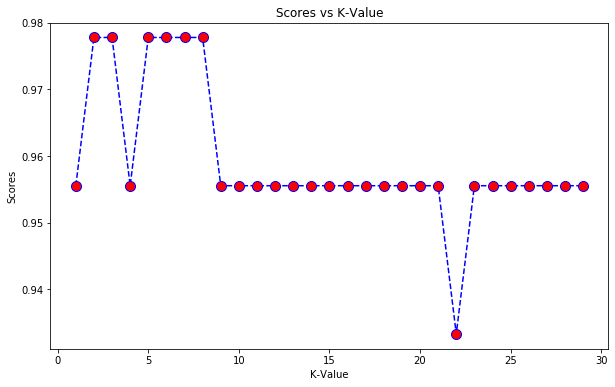

In [9]:
plt.figure(figsize =(10,6))
plt.plot(range(1,30), score_list, color= 'blue', linestyle ='dashed', 
         marker = 'o', markerfacecolor = 'red', markersize ='10')
plt.title ('Scores vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Scores')
plt.show()

In [10]:
knn = KNeighborsClassifier (n_neighbors = 1)
knn.fit(x,y)
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}
x_new =[[7,3.2,4.7,1.4], [4.4,2.9,1.4,0.2], [10,9,3,5],[6,2,3,10]]
y_pred = knn.predict(x_new)
print (classes[y_pred[0]])
print (classes[y_pred[1]])
print (classes[y_pred[2]])
print (classes[y_pred[3]])

versicolor
setosa
virginica
virginica
